In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/'
output_path =  '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_results/'

In [4]:
image_path = "/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/1.jpg"
image = cv.imread("/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/1.jpg")

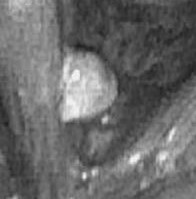

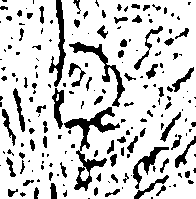

In [5]:
# Read the input image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding to segment the vessels
# thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 8)

# Display the original and segmented images
cv2_imshow(image)
cv2_imshow(thresholded)

In [6]:
original_images =[]
output_images =[]

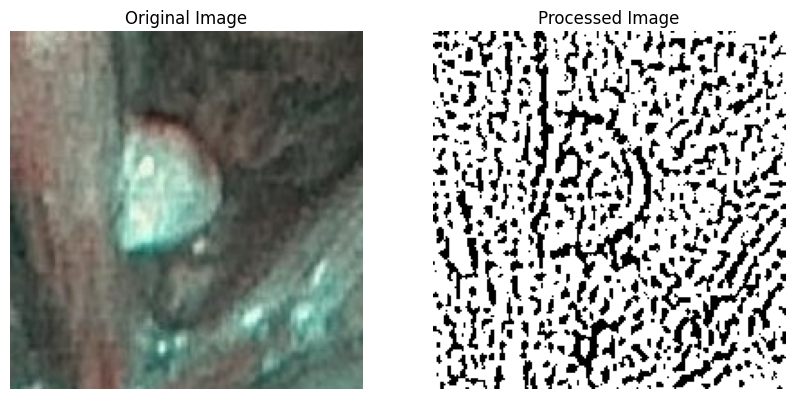

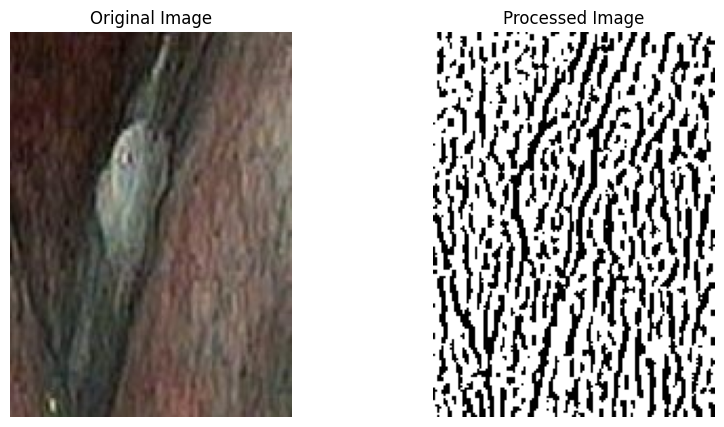

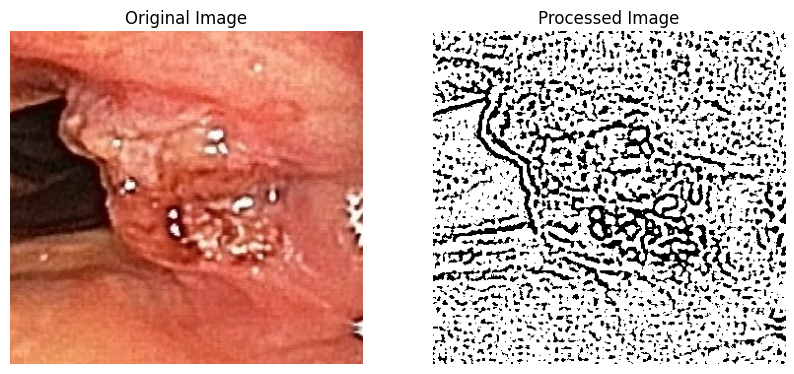

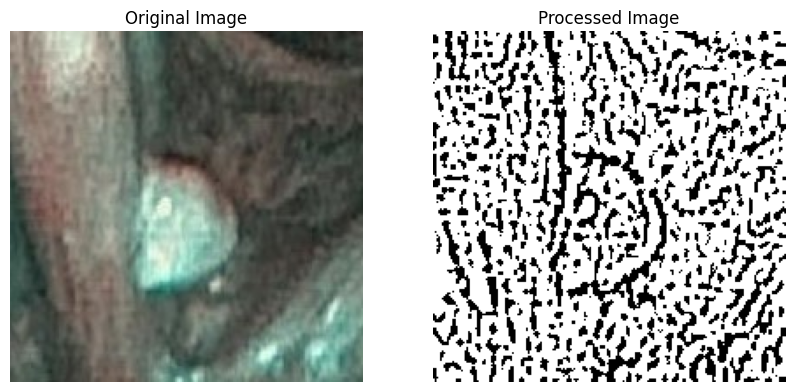

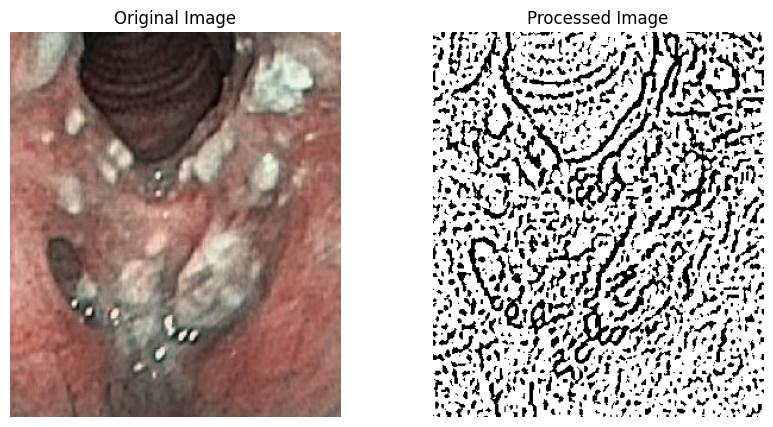

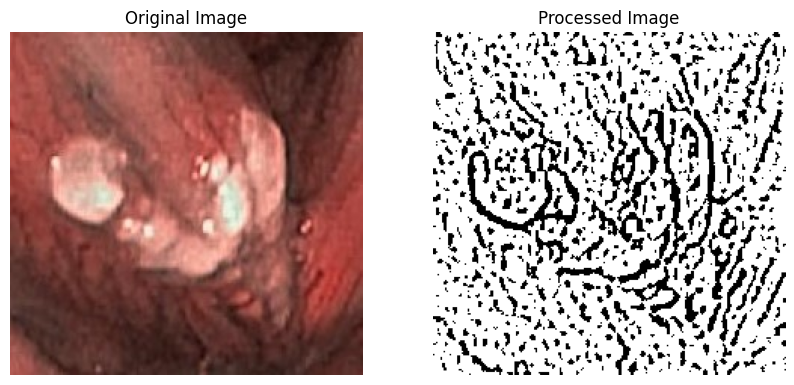

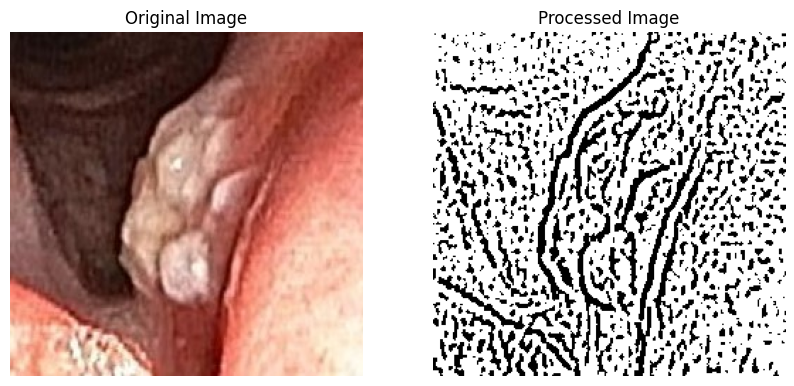

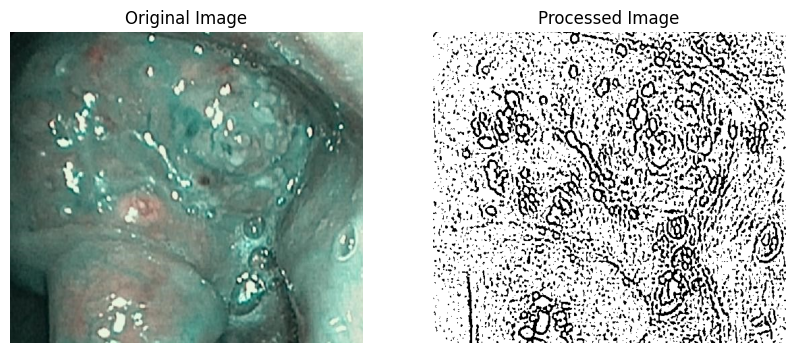

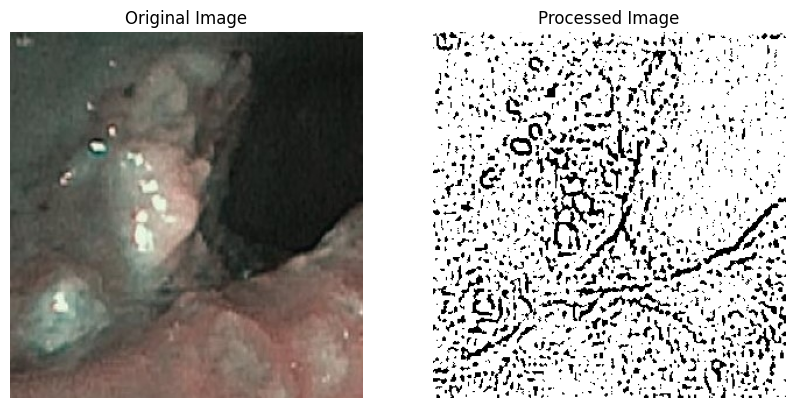

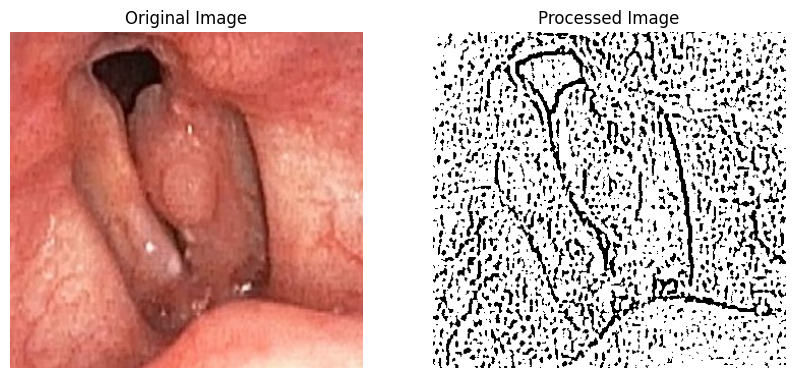

In [9]:
for im in os.listdir(dir_path):

  img = cv.imread(dir_path+im,cv2.IMREAD_GRAYSCALE)
  original_images.append(img)

  # Apply Gaussian blur to reduce noise
  blurred = cv2.GaussianBlur(img, (5, 5), 0)

  # Apply adaptive thresholding to segment the vessels
  # thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
  out_img = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 1.2)
  output_images.append(out_img)

  # Display img and out_img side by side
  img1 = cv2.imread(dir_path+im)
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')
  axes[0].axis('off')
  axes[1].imshow(out_img, cmap='gray')
  axes[1].set_title('Processed Image')
  axes[1].axis('off')
  plt.show()

  # Save the output image to the output folder
  output_image_path = os.path.join(output_path, im)
  cv.imwrite(output_image_path, out_img)